Описательная статистика по ценам:
count     112.000000
mean      888.247232
std       924.029469
min         0.000000
25%       224.000000
50%       670.000000
75%      1223.000000
max      4299.000000
Name: numeric_price, dtype: float64

Описательная статистика по рейтингам:
count    112.000000
mean      84.116071
std       11.930539
min       40.000000
25%       77.000000
50%       88.000000
75%       93.250000
max      100.000000
Name: rating, dtype: float64


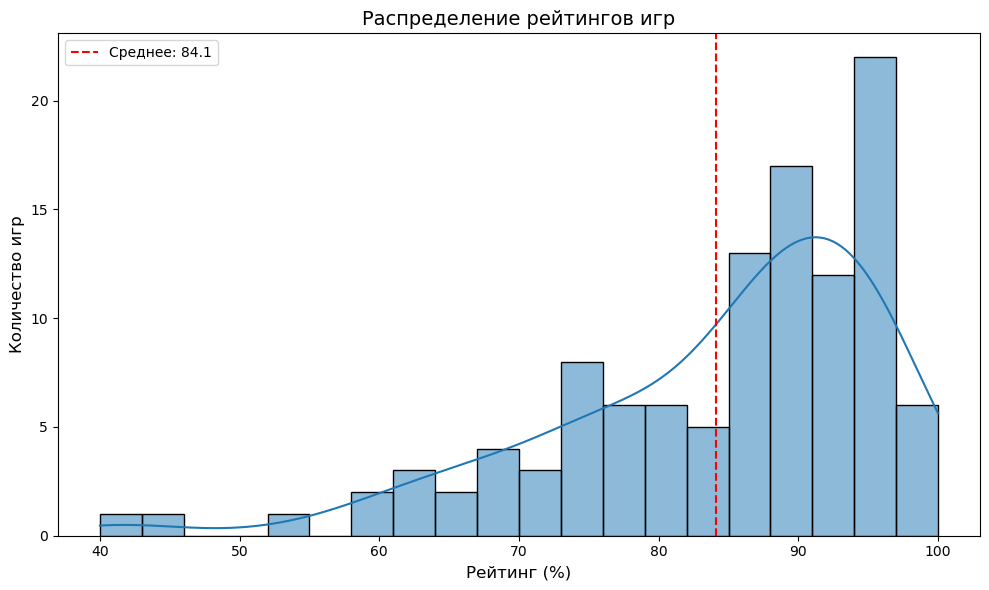

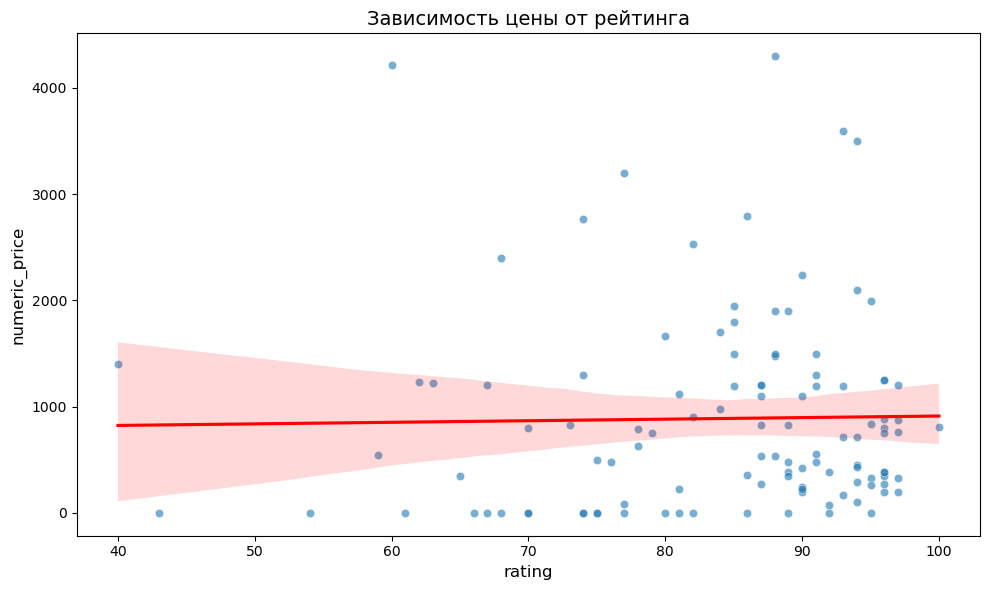

C:\Users\Home\AppData\Local\Temp\ipykernel_2208\2057574194.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_games, x='rating', y='title', palette='viridis')


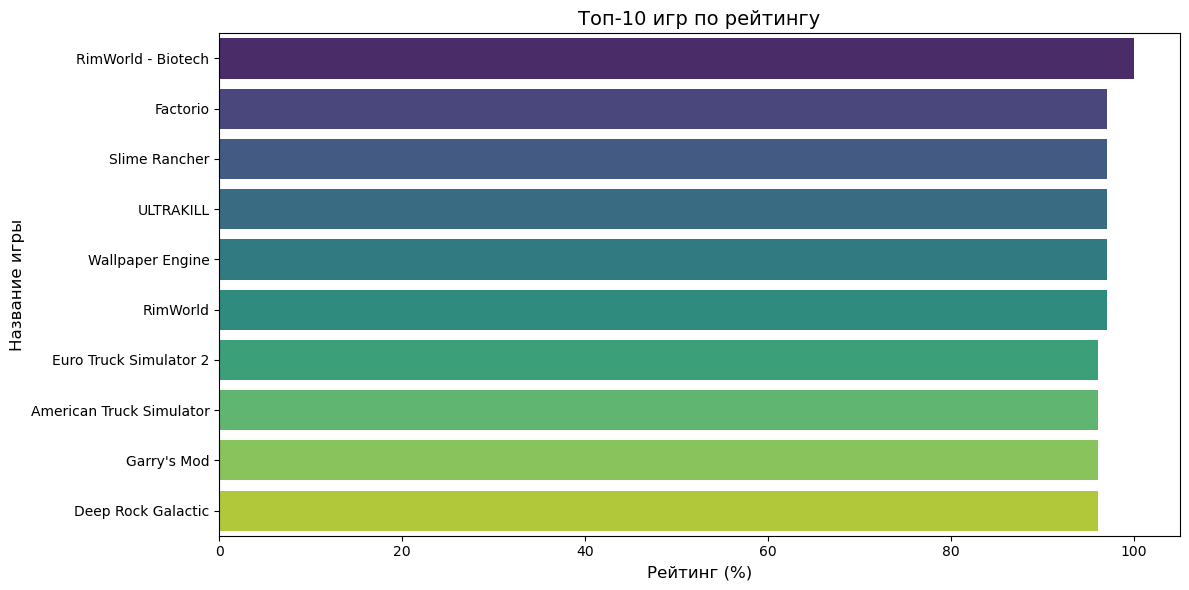


Корреляция между ценой и рейтингом: 0.02


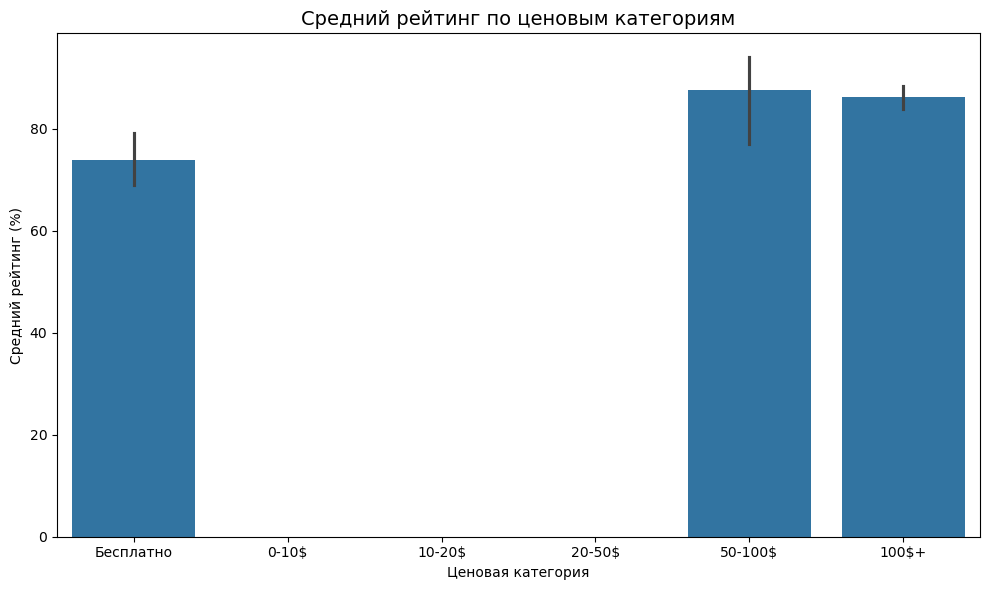


Ключевые выводы:
1. Средний рейтинг игр: 84.1%
2. Корреляция между ценой и рейтингом (0.02), это значит что рейтинг игры не зависит от цены
3. Бесплатные игры имеют средний рейтинг (74.0%)
4. Самые высокие рейтинги у игр с ценами 50-100$ (87.67%)
5. В топ-10 игр представлены как платные, так и бесплатные игры, что подтверждает что рейтинг не зависит от цены

Подводя итог можно сказать, что рейтинг игр не зависит от их стоимости, возможно так происходит от того что люди оценивают игры соразмерно их стоимости(то есть оценивают относительно ценовой категории этой игры) или качество игры не зависит от ее стоимости.


In [15]:
# Импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Загрузка данных
df = pd.read_csv('data/steam_games_ratings.csv')

# Очистка данных
df_clean = df.dropna(subset=['rating']).copy()

# Описательная статистика
print("Описательная статистика по ценам:")
print(df_clean['numeric_price'].describe())

print("\nОписательная статистика по рейтингам:")
print(df_clean['rating'].describe())

# Визуализация 1: Распределение рейтингов
plt.figure(figsize=(10, 6))
sns.histplot(data=df_clean, x='rating', bins=20, kde=True)
plt.title('Распределение рейтингов игр', fontsize=14)
plt.xlabel('Рейтинг (%)', fontsize=12)
plt.ylabel('Количество игр', fontsize=12)
plt.axvline(df_clean['rating'].mean(), color='red', linestyle='--', label=f'Среднее: {df_clean["rating"].mean():.1f}')
plt.legend()
plt.tight_layout()
plt.savefig('dashboard/ratings_distribution.png')
plt.show()

# Визуализация 2: Зависимость цены от рейтинга
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='rating', y='numeric_price', alpha=0.6)
plt.title('Зависимость цены от рейтинга', fontsize=14)
plt.xlabel('Рейтинг ', fontsize=12)
plt.ylabel('Цена (USD)', fontsize=12)

# Добавляем линию регрессии
sns.regplot(data=df_clean, x='rating', y='numeric_price', scatter=False, color='red')
plt.tight_layout()
plt.savefig('dashboard/price_vs_rating.png')
plt.show()

# Визуализация 3: Топ-10 игр по рейтингу
top_games = df_clean.sort_values('rating', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_games, x='rating', y='title', palette='viridis')
plt.title('Топ-10 игр по рейтингу', fontsize=14)
plt.xlabel('Рейтинг (%)', fontsize=12)
plt.ylabel('Название игры', fontsize=12)
plt.tight_layout()
plt.savefig('dashboard/top_rated_games.png')
plt.show()

# Корреляционный анализ
correlation = df_clean['numeric_price'].corr(df_clean['rating'])
print(f"\nКорреляция между ценой и рейтингом: {correlation:.2f}")

# Анализ по ценовым категориям
df_clean['price_category'] = pd.cut(df_clean['numeric_price'], 
                                   bins=[-1, 0, 10, 20, 50, 100, float('inf')],
                                   labels=['Бесплатно', '0-10$', '10-20$', '20-50$', '50-100$', '100$+'])

# Визуализация 4: Средний рейтинг по ценовым категориям
plt.figure(figsize=(10, 6))
sns.barplot(data=df_clean, x='price_category', y='rating', estimator=np.mean)
plt.title('Средний рейтинг по ценовым категориям', fontsize=14)
plt.xlabel('Ценовая категория', fontsize=10)
plt.ylabel('Средний рейтинг (%)', fontsize=10)
plt.tight_layout()
plt.savefig('dashboard/rating_by_price_category.png')
plt.show()

# Выводы
print("""
Ключевые выводы:
1. Средний рейтинг игр: {:.1f}%
2. Корреляция между ценой и рейтингом ({:.2f}), это значит что рейтинг игры не зависит от цены
3. Бесплатные игры имеют средний рейтинг ({:.1f}%)
4. Самые высокие рейтинги у игр с ценами 50-100$ ({:.2f}%), думаю что так происходит потому что такие игры расчитаны на достаточно состоятельную аудиторию, поэтому в среднем у нее чуть выше качество игр.
5. В топ-10 игр представлены как дешевые, так и дорогие песни, но нет бесплатных игр, что подтверждает что рейтинг, даже если и зависит от цены ,то очень слабо
""".format(
    df_clean['rating'].mean(),
    correlation,
    df_clean[df_clean['price_category'] == 'Бесплатно']['rating'].mean(),
    df_clean[df_clean['price_category'] == '50-100$']['rating'].mean()
))
print('Подводя итог можно сказать, что рейтинг игр почти не зависит от их стоимости, возможно так происходит от того что люди оценивают игры соразмерно их стоимости(то есть оценивают относительно ценовой категории этой игры) или качество игры не зависит от ее стоимости.')